<a href="https://colab.research.google.com/github/alexcoy06/Data-Science/blob/main/Project%202/Instacart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Project Overview and Setup: Understanding the Purpose

Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them. The dataset was publicly released by Instacart in 2017 for a Kaggle competition. The CSV files provided to me contain a modified version of that data. The dataset has a reduced size so that calculations run faster, and missing and duplicate values have been included. The distributions of the original data were carefully preserved in the changes made.

My task is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers. Along the way, I will be answering very important questions about the data. Additionally, I will be writing brief explanations of my results in a Jupyter notebook.

This project will require me to display all the skills I have acquired so far, such as:

- Creating graphs that display results
- Knowledge of Python and Pandas
- Testing both analytical and critical thinking
## 2 Project Setup

### 2.1 Add imports

First, I'm going to start with the basics by importing Pandas and Matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 2.2 Set up DataFrames

Now, variables will be created to make the code usable for anyone who wants to try or take a closer look at the following code.

In [2]:
# For those that have either forked or copied my repository.
order_loc = './datasets/instacart_orders.csv'
products_loc = './datasets/products.csv'
order_products_loc = './datasets/order_products.csv'
aisles_loc = './datasets/aisles.csv'
departments_loc = './datasets/departments.csv'

# For those that will use the Google Colab link
order_url = 'https://raw.githubusercontent.com/alexcoy06/Data-Science/main/Project%202/datasets/instacart_orders.csv'
products_url = 'https://raw.githubusercontent.com/alexcoy06/Data-Science/main/Project%202/datasets/products.csv'
order_products_url = 'https://raw.githubusercontent.com/alexcoy06/Data-Science/main/Project%202/datasets/order_products.csv'
aisles_url = 'https://raw.githubusercontent.com/alexcoy06/Data-Science/main/Project%202/datasets/aisles.csv'
departments_url = 'https://raw.githubusercontent.com/alexcoy06/Data-Science/main/Project%202/datasets/departments.csv'

Next, I will assign each CSV file to a variable so that it becomes an accessible DataFrame.

Within my variables, you may notice that in the res_csv method, I have added the sep parameter. This parameter allows the columns to be correctly displayed. Otherwise, the outputs would look like this:

```
  order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order
0                        1515936;183418;11;6;13;30.0                              
1                          1690866;163593;5;5;12;9.0  
```

Instead of the following, as seen below:

In [3]:
# Change this to the appropriate variable per your situation
orders = pd.read_csv(order_loc, sep=';')
products = pd.read_csv(products_loc, sep=';')
order_products = pd.read_csv(order_products_loc, sep=';')
aisles = pd.read_csv(aisles_loc, sep=';')
departments = pd.read_csv(departments_loc, sep=';')

### 2.3 CSV File Inspection

I will verify that each DataFrame is being accessed correctly by displaying just a sample of the first couple of rows. For this, I will be using the `orders` DataFrame as an example, what I will also apply to all of the other DataFrames.

In [4]:
# the line below is my sep correction example from above
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


### 2.4 Correcting data values

Now, we want to take a moment to correct data types within our data frames to avoid unexpected errors or calculations. Essentially, we want to ensure that if we're parsing through the data, and it's meant to represent something like a user ID, it doesn't undergo mathematical operations but rather registers as a string, retaining its original value.

#### 2.4.1 `aisles` data frame

In [5]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In this case, when we run `info()` to check the data types of all the different Callisters, we notice that `aisle_id` registers as an integer, or `int64`. I'll be changing that to a string since it's not intended to represent a mathematical number.

In [6]:
aisles['aisle_id'] = aisles['aisle_id'].astype('str')
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    object
 1   aisle     134 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB


#### 2.4.2 `departments` data frame

In [7]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


The same applies to the departments data frame with the `department_id` column. When we check the data types, we find that it registers as an integer. I'll also convert it to a string.

In [8]:
departments['department_id'] = departments['department_id'].astype('str')
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     object
 1   department     21 non-null     object
dtypes: object(2)
memory usage: 468.0+ bytes


#### 2.4.3 `orders` data frame

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


Now I am starting to see that all of the data frames have multiple instances of columns containing some form of ID, and some of these different types of IDs seem to overlap from one data frame to another. This would further justify turning them into objects, showing that these are specific, matchable objects.

In [10]:
orders['order_id'] = orders['order_id'].astype('str')
orders['user_id'] = orders['user_id'].astype('str')

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  object 
 1   user_id                 478967 non-null  object 
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 21.9+ MB


#### 2.4.4 `order_products` data frame

In [11]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


Both `order_id` and `product_id` need to be changed to objects.

In [12]:
order_products['order_id'] = order_products['order_id'].astype('str')
order_products['product_id'] = order_products['product_id'].astype('str')

order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           object 
 1   product_id         object 
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 138.7+ MB


#### 2.4.5 `products` data frame

In [13]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Based on the names of each column in the `products` DataFrame, I believe that all of the values should be objects; none of these values should have any mathematical value. So, just like above, the column with integer values will be changed to objects. This will allow us to safely use this data frame as a reference for understanding other data frames, without fear of changing these values.

In [14]:
products['aisle_id'] = products['aisle_id'].astype('str')
products['department_id'] = products['department_id'].astype('str')
products['product_id'] = products['product_id'].astype('str')

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  object
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  object
 3   department_id  49694 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


## 3 Find and remove duplicate values

Now that I've confirmed that my dataframes are displaying correctly, I can start processing and cleaning the data frames. I'll begin by looking for all duplicate values. I'm going to mainly use the `.duplicated().count()` method to identify and count the duplicate rows.

### 3.1 `orders` data frame

In [15]:
print(f'Their are {orders.duplicated().sum()} duplicates!')

Their are 15 duplicates!


There are a few duplicates, which will be handled later. But for now, I would like to see all orders that were placed on **Wednesday** at **2:00 A.M.**

> 💡 **Note:**<br>
> By deductive reasoning, I have noticed that Instacart does employ data scientists. Many data scientists tend to use Pandas, as observed. According to the Pandas [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.dayofweek.html), days of the week are numerically ordered from zero to six, corresponding to Monday to Sunday. This leads me to believe that it was intentionally left this way.

In [16]:
wednesday_at_2 = orders[(orders['order_dow'] == 2) & (orders['order_hour_of_day'] == 2)]
wednesday_at_2

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
1295,1474941,115569,5,2,2,28.0
2391,1640269,173965,15,2,2,2.0
2550,1223696,55276,11,2,2,30.0
5965,579194,85018,14,2,2,11.0
17680,2004230,203121,4,2,2,8.0
...,...,...,...,...,...,...
457660,1562381,19378,5,2,2,6.0
460316,1986084,117453,81,2,2,8.0
462676,1362113,19654,20,2,2,21.0
472800,1746383,88484,19,2,2,5.0


Now I will drop the duplicates using the `drop_duplicates()` method to get rid of all duplicates.

In [17]:
orders = orders.drop_duplicates()

To ensure that I no longer have any duplicates, I'm going to verify it again using the `.duplicated().sum()` method.

In [18]:
print(f'Their are {orders.duplicated().sum()} duplicates!')

Their are 0 duplicates!


To be thorough, I just want to double-check to ensure there are no duplicates in `order_id`.

In [19]:
print(f"Their are {orders['order_id'].duplicated().sum()} duplicates!")

Their are 0 duplicates!


### 3.2 `products` data frame

In [20]:
print(f"Their are {products.duplicated().sum()} duplicates!")

Their are 0 duplicates!


So far, I haven't found any duplicates, which is great. However, now I want to check if there are any duplicates in the 'product_id' column.

In [21]:
print(f"Their are {products['product_id'].duplicated().sum()} duplicates in the `product_id`!")

Their are 0 duplicates in the `product_id`!


So far, there continue to be no duplicates, but to better understand the data, I want to check for duplicates in the 'product_name' column. However, to ensure accuracy, I'll need to standardize all product names by converting them to lowercase. I'll be using `value_counts` in this instance to sample my data and see if any duplicates emerge.

In [22]:
products['product_name'] = products['product_name'].str.lower()
duplicate_names = products['product_name'].value_counts()
duplicate_names[duplicate_names > 1]

product_name
green tea with ginseng and honey                                        3
carrot and celery sticks                                                2
apricot energy bar                                                      2
top the tater chive & onion sour cream                                  2
proactive health indoor weight & hairball care with chicken cat food    2
                                                                       ..
cauliflower head                                                        2
half and half                                                           2
original bbq sauce                                                      2
spreadable butter with canola oil                                       2
mandarin oranges in light syrup                                         2
Name: count, Length: 103, dtype: int64

While reviewing the data, I noticed some duplicate values, notably with `green tea with ginseng and honey,` which has the highest number of duplicates. Reflecting on my experience at Home Depot, I realized that despite having different product IDs, these duplicates likely refer to the same product but in varying quantities. Considering this, I would suggest notifying Instacart to ensure this information is included in the next update.

But to continue being thorough, I will check for duplicate product names that aren't missing.

In [23]:
products_names = products[products['product_name'].duplicated() & ~products['product_name'].isnull()]
products_names = products_names['product_name'].value_counts()
products_names[products_names > 1]

product_name
green tea with ginseng and honey    2
Name: count, dtype: int64

### 3.3 `departments` data frame

I also want to check the `departments` data for duplicates. However, upon inspection, it appears small enough to confirm that there are no errors present or corrections needed.

In [24]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


### 3.4  `aisles` data frame

For similar reasons as the `departments` dataframe, the same can be said for `aisles,` as it only has two columns, and neither of them repeats, as seen below.

In [25]:
print(f"There are {aisles['aisle'].duplicated().sum()} duplicates in the aisles columm and {aisles['aisle_id'].duplicated().sum()} in the aisles_id column.")

There are 0 duplicates in the aisles columm and 0 in the aisles_id column.


### 3.5 `order_products` data frame

In [26]:
print(f"Their are {order_products.duplicated().sum()} duplicates!")

Their are 0 duplicates!


There are no duplicated rows, which is great. However, I would like to be thorough and ensure there are no duplicate values elsewhere. Upon further inspection, the only significant duplicates that could potentially lead to errors might occur in the `order_id`, where there are multiple instances of the same `product_id`. Especially considering the `add_to_cart_order` column, should indicate the number of times a product is needed for each order.

In [27]:
multi_op = order_products.duplicated(subset=['order_id', 'product_id']).sum()
print(f"Their are {multi_op} duplicates!")

Their are 0 duplicates!


## 4  Find and remove missing values

Next, I will be handling missing values. With that said, the method you will see me using throughout this section is `.isna().sum()`, similar to the `.duplicated().sum()`. This method identifies the targeted value, which is a None value, and sums up, counting the total number of occurrences.

### 4.1 `products` data frame

In [28]:
products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

It seems that all of the missing data is in the `product_name` column. I don't know what these products are, but I can see what `department_id` and `aisles` they come from to help narrow down what they could be.

In [29]:
products_missing = products[products['product_name'].isnull()]
missing_department = products_missing['department_id'].value_counts()
missing_department

department_id
21    1258
Name: count, dtype: int64

It seems that all the products with missing data are coming from one department, and now I need to see which aisles they are coming from in that department.

In [30]:
missing_aisle = products_missing['aisle_id'].value_counts()
missing_aisle

aisle_id
100    1258
Name: count, dtype: int64

After going through the dataframe and taking the time to check the other dataframes, it seems as though all of the missing values are intentional. Every product with a missing product name belongs to the missing department in the missing aisle. With that in mind, we can't leave these values empty, so we will replace them with `Unknown` for a product name.

In [31]:
products['product_name'] = products['product_name'].fillna('Unkown')
print(f"Their are {products['product_name'].isna().sum()} missing values!")

Their are 0 missing values!


### 4.2 `orders` data frame

In [32]:
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

I believe that the 'days_since_prior_order' should be closely related to the 'order_number', as you can have a prior order even if it's your first order. That's what I'll be checking for—instances when that is not the case.

In [33]:
missing_prior = orders[orders['days_since_prior_order'].isnull()]
not_first = missing_prior[missing_prior['order_number'] != 1]
print(f"Their are {not_first['order_number'].sum()} missing values!")

Their are 0 missing values!


"It seems that my educated guess was correct."

### 4.3 `order_products` data frame

In [34]:
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

Because I noticed that the `add_to_cart_order` has many different numbers, I would like to investigate if there are any outlier reasons for the missing values by examining the minimum and maximum numbers.

In [35]:
print(f"In the `add_to_cart_order` column the min is {order_products['add_to_cart_order'].min()} and the max is {order_products['add_to_cart_order'].max()}.")

In the `add_to_cart_order` column the min is 1.0 and the max is 64.0.


Now, I would like to investigate if there is any correlation between `order_id` and the total number of items being added to the cart for each order. I want to identify which orders have the `add_to_cart_order` missing value.

In [36]:
missing_cart = order_products[order_products['add_to_cart_order'].isnull()]['order_id'].unique()
missing_cart

array(['2449164', '1968313', '2926893', '1717990', '1959075', '844733',
       '61355', '936852', '264710', '1564093', '129627', '293169',
       '2849370', '1386261', '3308010', '903110', '2136777', '3347453',
       '1888628', '165801', '2094761', '1038146', '2997021', '813364',
       '2256933', '171934', '2409109', '1730767', '1169835', '733526',
       '404157', '3125735', '747668', '1800005', '1961723', '871281',
       '388234', '1648217', '1477139', '102236', '1021563', '1832957',
       '2721963', '678116', '1220886', '1673227', '2999801', '1633337',
       '2470674', '2625444', '1677118', '2479011', '3383594', '1183255',
       '1713430', '2652650', '1598369', '1916118', '854647', '1302315',
       '888470', '180546', '2621907', '1308785', '2729254', '9310',
       '2170451', '2979697', '1625713', '1529171'], dtype=object)

Now, I want to determine if the error is related to the maximum number of items being added to the cart.

In [37]:
missing_cart = order_products[order_products['order_id'].isin(missing_cart)]
grouped_sum = (missing_cart.groupby('order_id')['add_to_cart_order'].sum() <= 64).any()
grouped_sum

False

Since the return of 'false', there is a strong indication that we have missing errors due to the number of items added to an order. With that in mind, I would like to assign a default value of 999 to the missing values.

In [38]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('Int64').fillna(0)
order_products.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

## [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [39]:
orders_info = orders.dtypes.loc[['order_hour_of_day', 'order_dow']]
orders_info

order_hour_of_day    int64
order_dow            int64
dtype: object

Both `'order_hour_of_day'` and `'order_dow'` are currently integers. I would like to convert them into date-time objects, representing hours (`%H`) and weekdays (`%w`) respectively.

In [40]:
orders_details = orders[['order_dow', 'order_hour_of_day']].describe().loc[['min', 'max']]
orders_details

,order_dow,order_hour_of_day
min,0.0,0.0
max,6.0,23.0


### [A2] What time of day do people shop for groceries?

For this, I would like to rely on the median, which would provide a more accurate representation of the time of day. Unlike the average, the median takes into account different peaks in the day and how often people visit at a specific time, which is what I am interested in.

In [41]:
orders['order_hour_of_day'].value_counts().head()

order_hour_of_day
10    40578
11    40032
15    39789
14    39631
13    39007
Name: count, dtype: int64

After taking a moment to display the median for the hour of the day, it can be noted that 10 is the busiest time of day. However, by using value_counts and displaying the top 5 busiest hours of the day, we can see that not only does the adjacent hour of 11 closely follow behind at less than a 2% difference, but it continues to be busy consistently until the 15th hour of the day.

Based on what I found, the period from 10 to 11 is definitely the busiest portion of the day, consistently, regardless of the day.

### [A3] What day of the week do people shop for groceries?

In [42]:
# I need help with changing the order_dow
orders['order_dow'].value_counts().head()

order_dow
0    84090
1    82185
2    65833
5    63488
6    62649
Name: count, dtype: int64

Based on the median, we can see that the busiest day of the week tends to be Monday, represented by the number 0. The following values listed in the value count show that the busiest days are centered around Monday, starting with Saturday, which for most would be the day following 'payday.' For the most part, all of this makes sense, and the logic follows.

### [A4] How long do people wait until placing another order?

For this, I will need to calculate the average time people place an order, excluding individuals who have only ordered once.

In [43]:
ave_prior = orders['days_since_prior_order'].mean()
print(f'The average number of days would be {ave_prior:.0f}')

The average number of days would be 11


## [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

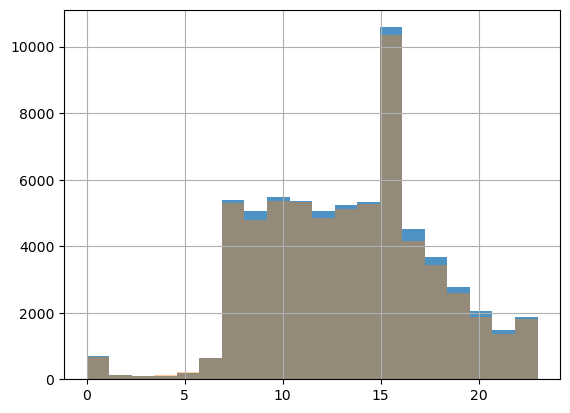

In [44]:
wednesday_orders = orders[orders['order_dow'] == 2]
saturday_orders = orders[orders['order_dow'] == 5]

wednesday_orders['order_hour_of_day'].hist(
    alpha=0.8,
    bins=20
)
saturday_orders['order_hour_of_day'].hist(
    alpha=0.4,
    bins=20
)

plt.show()

Wendsday looks like it gets more traffic, but they both seem to carry the same pattern thought the day.

### [B2] What's the distribution for the number of orders per customer?

In [45]:
order_per_person = orders.groupby('user_id')['order_number'].mean()
order_per_person = order_per_person.mean()
print(f"{order_per_person:.0f} per person")

10 per person


### [B3] What are the top 20 popular products (display their id and name)?

In [46]:
# this finds the sum of each product
hot_item = order_products.groupby('product_id')['add_to_cart_order'].sum()

# now we order them greatest to least and only show the top 20
hot_item = hot_item.sort_values(ascending=False).head(20)

# final we take are new dataframe and merge it with the products to see the names
hot_item = pd.merge(hot_item, products, on='product_id', how='inner')
hot_item

,product_id,add_to_cart_order,product_name,aisle_id,department_id
0,24852,321962,banana,24,4
1,13176,271774,bag of organic bananas,24,4
2,21137,268494,organic strawberries,24,4
3,21903,254234,organic baby spinach,123,4
4,47209,201977,organic hass avocado,24,4
5,47626,171731,large lemon,24,4
6,26209,170864,limes,24,4
7,47766,160678,organic avocado,24,4
8,16797,141625,strawberries,24,4
9,27966,138046,organic raspberries,123,4


## [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [47]:
typical_buy = orders.groupby('order_id')['order_number'].mean()
print(f"People tend to order {typical_buy.mean():.0f} items per order.")

People tend to order 17 items per order.


### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [48]:
most_reordered = order_products.groupby('product_id')['reordered'].sum()
most_reordered = most_reordered.sort_values(ascending=False).head(20)
most_reordered = pd.merge(most_reordered, products, on='product_id', how='inner')
most_reordered

,product_id,reordered,product_name,aisle_id,department_id
0,24852,55763,banana,24,4
1,13176,44450,bag of organic bananas,24,4
2,21137,28639,organic strawberries,24,4
3,21903,26233,organic baby spinach,123,4
4,47209,23629,organic hass avocado,24,4
5,47766,18743,organic avocado,24,4
6,27845,16251,organic whole milk,84,16
7,47626,15044,large lemon,24,4
8,27966,14748,organic raspberries,123,4
9,16797,13945,strawberries,24,4


### [C3] For each product, what proportion of its orders are reorders?

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first?

## Overall observation

Based on the data provided, numerous patterns and consistencies are evident throughout the data frames. It's noticeable that:
- The busiest days of the week coincide with the days following Friday. This makes sense considered payday for many tends to be right before the weekend.
- Additionally, Instacart appears to be primarily utilized for its healthy food choices in the Produce department, with aisle 24 experiencing the highest traffic.

This information proves invaluable at every stage of the business. It allows for informed scheduling, indicating when peak staffing is required and providing insights into why specific times may be more advantageous for employee shifts. By identifying the busiest work hours, we can optimize staff allocation and suggest optimal times for restocking shelves. Moreover, we can pinpoint which aisles require the most attention and utilize trending patterns to predict demand accurately, ensuring adequate stock levels.